In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [9]:
#introduce stopwords
stopwords = set(stopwords.words('english'))

In [6]:
#load and import the dataset
df = pd.read_csv('./IMDB Dataset.csv')

In [40]:
df.head(8)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
X = df['review']
y = df['sentiment']

In [11]:
#remove stopwords
X = X.apply(lambda review: [w for w in review.split() if w not in stopwords])

In [12]:
#convert to all lower case
X = X.apply(lambda review: [w.lower() for w in review])

In [13]:
#remove html tags
X = X.replace({'<.*?>': ''}, regex=True)

In [14]:
#remove non-alphabetical characters:
X = X.replace({'[^A-Za-z]': ''}, regex=True)

In [15]:
#change polarity labels into numbers:
y = y.replace('positive', 1)
y = y.replace('negative', 0)

In [16]:
X.head()

0    [one, reviewers, mentioned, watching, 1, oz, e...
1    [a, wonderful, little, production., <br, /><br...
2    [i, thought, wonderful, way, spend, time, hot,...
3    [basically, there's, family, little, boy, (jak...
4    [petter, mattei's, "love, time, money", visual...
Name: review, dtype: object

In [17]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [18]:
#train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [19]:
#text tokenization
token = Tokenizer(lower=False)
token.fit_on_texts(X_train)

In [20]:
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

max_length = 300

X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

In [21]:
total_words = len(token.word_index) + 1

In [22]:
#build a lstm model:
EMBED_DIM = 32
LSTM_OUT = 64

#build and add each layer:
lstm = Sequential()
lstm.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
lstm.add(LSTM(LSTM_OUT))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [24]:
#fit the training data into the lstm model
lstm.fit(X_train, y_train, batch_size = 128, epochs = 7)

Epoch 1/7
196/196 [==============================] - 47s 239ms/step - loss: 0.4730 - accuracy: 0.7566
Epoch 2/7
196/196 [==============================] - 49s 250ms/step - loss: 0.1376 - accuracy: 0.9530
Epoch 3/7
196/196 [==============================] - 48s 247ms/step - loss: 0.0355 - accuracy: 0.9906
Epoch 4/7
196/196 [==============================] - 50s 254ms/step - loss: 0.0178 - accuracy: 0.9953
Epoch 5/7
196/196 [==============================] - 48s 243ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 6/7
196/196 [==============================] - 48s 243ms/step - loss: 8.3400e-04 - accuracy: 0.9999
Epoch 7/7
196/196 [==============================] - 49s 249ms/step - loss: 0.0047 - accuracy: 0.9986


In [29]:
#use lstm model to test
y_pred = lstm.predict_classes(X_test, batch_size=128)

In [94]:
#model evaluation, getting the accuracy score
true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true +=1
        
print('LSTM Accuracy: {}'.format(true/len(y_pred)))

LSTM Accuracy: 0.82736


In [32]:
from sklearn.metrics import confusion_matrix

In [37]:
from sklearn.metrics import classification_report

In [33]:
#Confusion matrix for RNN with LSTM
cm_rnn=confusion_matrix(y_test,y_pred)

In [35]:
import scikitplot as skplt

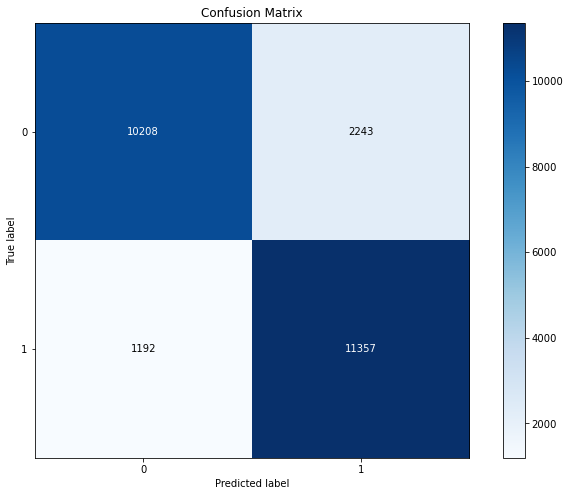

In [36]:
#plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=False,figsize=(12,8))
plt.show()

In [38]:
#Classification report for performance metrics
cr_rnn=classification_report(y_test,y_pred)
print('The Classification report is::\n',cr_rnn)

The Classification report is::
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     12451
           1       0.84      0.91      0.87     12549

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000



In [41]:
#Builidng a Logistic Regression Model
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
docs = np.array(['The sun is shining',
                'The weather is sweet',
                'The sun is shining, the weather is sweet, and one and one is two'])


In [43]:
#tokenize the docs into a bag of words:
count = CountVectorizer()
bag = count.fit_transform(docs)

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
#use tfidf to transform the text tokens into vectors
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

In [46]:
print(tfidf.fit_transform(bag).toarray())

[[0.         0.43370786 0.         0.55847784 0.55847784 0.
  0.43370786 0.         0.        ]
 [0.         0.43370786 0.         0.         0.         0.55847784
  0.43370786 0.         0.55847784]
 [0.50238645 0.44507629 0.50238645 0.19103892 0.19103892 0.19103892
  0.29671753 0.25119322 0.19103892]]


In [47]:
#word stemming:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [48]:
def tokenizer(text):
    return text.split()

In [49]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
#tfidf features
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True, norm='l2', smooth_idf=True)

In [52]:
y = df.sentiment.values
X = tfidf.fit_transform(df.review)

In [53]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.5)

In [54]:
from sklearn.linear_model import LogisticRegressionCV

In [55]:
#fit a logistic regression model
clf = LogisticRegressionCV(cv=5,
                           scoring='accuracy',
                           random_state=0,
                           n_jobs=-1,
                           verbose=3,
                           max_iter=300).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


In [56]:
#save the logistic regression model
import pickle

In [57]:
saved_clf = open('saved_clf.sav','wb')
pickle.dump(clf,saved_clf)
saved_clf.close()

In [58]:
filename = 'saved_clf.sav'
saved_clf = pickle.load(open(filename, 'rb'))

In [117]:
#Logistic regression model accuracy
saved_clf.score(X_test, y_test)
print('Logistic Regression model score: ',saved_clf.score(X_test,y_test))

Logistic Regression model score:  0.89076


In [60]:
#Random forest model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
#build a random forest classifier
rf = RandomForestClassifier(n_estimators=64)

In [65]:
#fit a random forest model
rf = rf.fit(X_train, y_train)

In [66]:
rf_score = rf.score(X_train, y_train)

In [113]:
#use random forest model to predict
rf_pred = rf.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

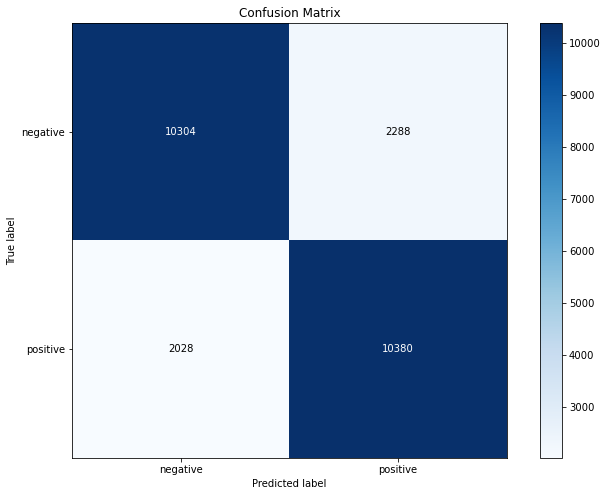

In [114]:
#show the confusion matrix of random forest model
rf_cm = confusion_matrix(y_test, rf_pred)

skplt.metrics.plot_confusion_matrix(y_test, rf_pred, normalize=False, figsize=(12,8))

In [115]:
#random forest model report
rf_cr = classification_report(y_test, rf_pred)
print('Random forest classification report is::\n', rf_cr)

Random forest classification report is::
               precision    recall  f1-score   support

    negative       0.84      0.82      0.83     12592
    positive       0.82      0.84      0.83     12408

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [76]:
#SVM model

In [85]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [79]:
#build a svm classifier
svm = SGDClassifier(max_iter=1000, random_state=42)

In [88]:
#fit the random svm model
svm = svm.fit(X_train, y_train)

In [90]:
#making predictions using svm
svm_pred = svm.predict(X_test)

In [91]:
#evaluate svm
svm_score=accuracy_score(y_test, svm_pred)

In [93]:
print("svm_score :", svm_score)

svm_score : 0.88744


In [96]:
#print svm model report
svm_report = classification_report(y_test, svm_pred)

In [97]:
print(svm_report)

              precision    recall  f1-score   support

    negative       0.90      0.87      0.89     12592
    positive       0.87      0.90      0.89     12408

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

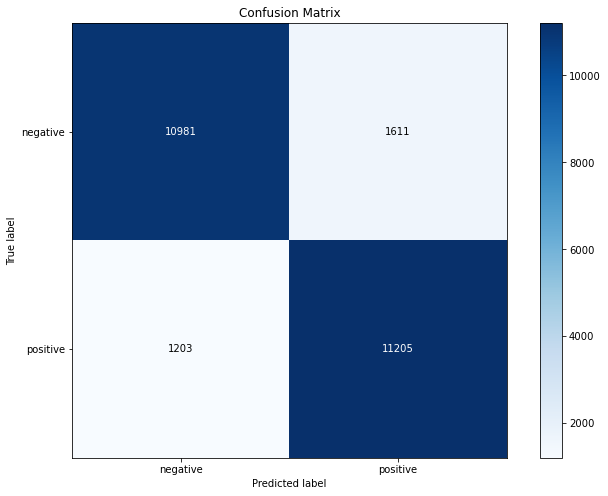

In [107]:
#svm confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)
skplt.metrics.plot_confusion_matrix(y_test, svm_pred, normalize=False, figsize=(12,8))

In [102]:
#NB model

In [103]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
#build NB classifer
nb = MultinomialNB()

In [105]:
#fit NB model using train data
nb = nb.fit(X_train, y_train)

In [108]:
#predict using NB model
nb_pred = nb.predict(X_test)
print(nb_pred)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'positive']


In [118]:
#accuracy
nb_score = accuracy_score(y_test, nb_pred)
print("nb_score :", nb_score)

nb_score : 0.86668


In [111]:
#Naive Bayes model report
nb_report = classification_report(y_test, nb_pred)
print(nb_report)

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87     12592
    positive       0.87      0.86      0.86     12408

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

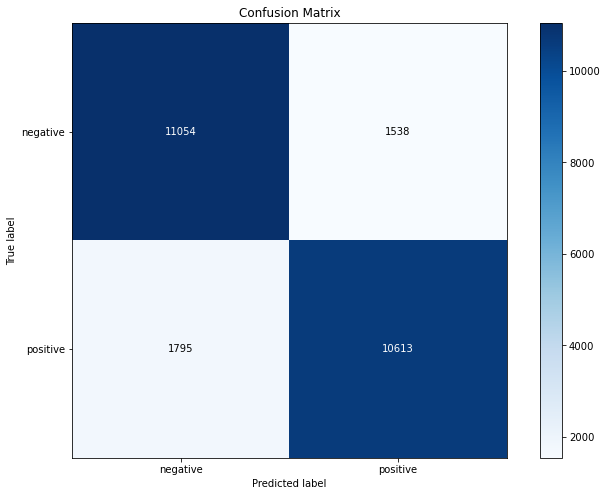

In [112]:
#NB model matrix
nb_cm = confusion_matrix(y_test, nb_pred)
skplt.metrics.plot_confusion_matrix(y_test, nb_pred, normalize=False, figsize=(12,8))